In [1]:
import numpy as np 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# We will be using make_circles from scikit-learn
from sklearn.datasets import make_circles

SEED = 2017

In [2]:
# We create an inner and outer circle
X, y = make_circles(n_samples=400, factor=.3, noise=.05, random_state=2017)
outer = y == 0
inner = y == 1

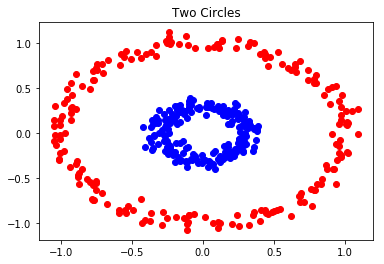

In [3]:
plt.title("Two Circles")
plt.plot(X[outer, 0], X[outer, 1], "ro")
plt.plot(X[inner, 0], X[inner, 1], "bo")
plt.show()

In [4]:
X = X+1

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [7]:
n_hidden = 50 # number of hidden units
n_epochs = 1000
learning_rate = 1

In [8]:
# Initialise weights
weights_hidden = np.random.normal(0.0, size=(X_train.shape[1], n_hidden))
weights_output = np.random.normal(0.0, size=(n_hidden))

hist_loss = []
hist_accuracy = []

In [10]:
for e in range(n_epochs):
    del_w_hidden = np.zeros(weights_hidden.shape)
    del_w_output = np.zeros(weights_output.shape)

    # Loop through training data in batches of 1
    for x_, y_ in zip(X_train, y_train):
        # Forward computations
        hidden_input = np.dot(x_, weights_hidden)
        hidden_output = sigmoid(hidden_input)
        output = sigmoid(np.dot(hidden_output, weights_output))

        # Backward computations
        error = y_ - output
        output_error = error * output * (1 - output)
        hidden_error = np.dot(output_error, weights_output) * hidden_output * (1 - hidden_output)
        del_w_output += output_error * hidden_output
        del_w_hidden += hidden_error * x_[:, None]

    # Update weights
    weights_hidden += learning_rate * del_w_hidden / X_train.shape[0]
    weights_output += learning_rate * del_w_output / X_train.shape[0]

    # Print stats (validation loss and accuracy)
    if e % 100 == 0:
        hidden_output = sigmoid(np.dot(X_val, weights_hidden))
        out = sigmoid(np.dot(hidden_output, weights_output))
        loss = np.mean((out - y_val) ** 2)
        # Final prediction is based on a threshold of 0.5
        predictions = out > 0.5
        accuracy = np.mean(predictions == y_val)
        print("Epoch: ", '{:>4}'.format(e), 
            "; Validation loss: ", '{:>6}'.format(loss.round(4)), 
            "; Validation accuracy: ", '{:>6}'.format(accuracy.round(4)))

Epoch:     0 ; Validation loss:  0.2532 ; Validation accuracy:    0.65
Epoch:   100 ; Validation loss:   0.207 ; Validation accuracy:    0.75
Epoch:   200 ; Validation loss:  0.1707 ; Validation accuracy:     0.8
Epoch:   300 ; Validation loss:  0.1428 ; Validation accuracy:   0.825
Epoch:   400 ; Validation loss:  0.1211 ; Validation accuracy:  0.8625
Epoch:   500 ; Validation loss:  0.1043 ; Validation accuracy:  0.9125
Epoch:   600 ; Validation loss:  0.0914 ; Validation accuracy:   0.925
Epoch:   700 ; Validation loss:  0.0813 ; Validation accuracy:    0.95
Epoch:   800 ; Validation loss:  0.0733 ; Validation accuracy:  0.9875
Epoch:   900 ; Validation loss:  0.0669 ; Validation accuracy:     1.0
